<a href="https://colab.research.google.com/github/mrudula1116/ml-projects/blob/main/HousePrice_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(sklearn.datasets.fetch_california_housing)

<function fetch_california_housing at 0x7ba03d510e00>


In [ ]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [ ]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
# add the target (price) column to the DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_dataframe.shape

(20640, 9)

In [ ]:
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset

1.Positive Correlation

2.Negative Correlation





,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


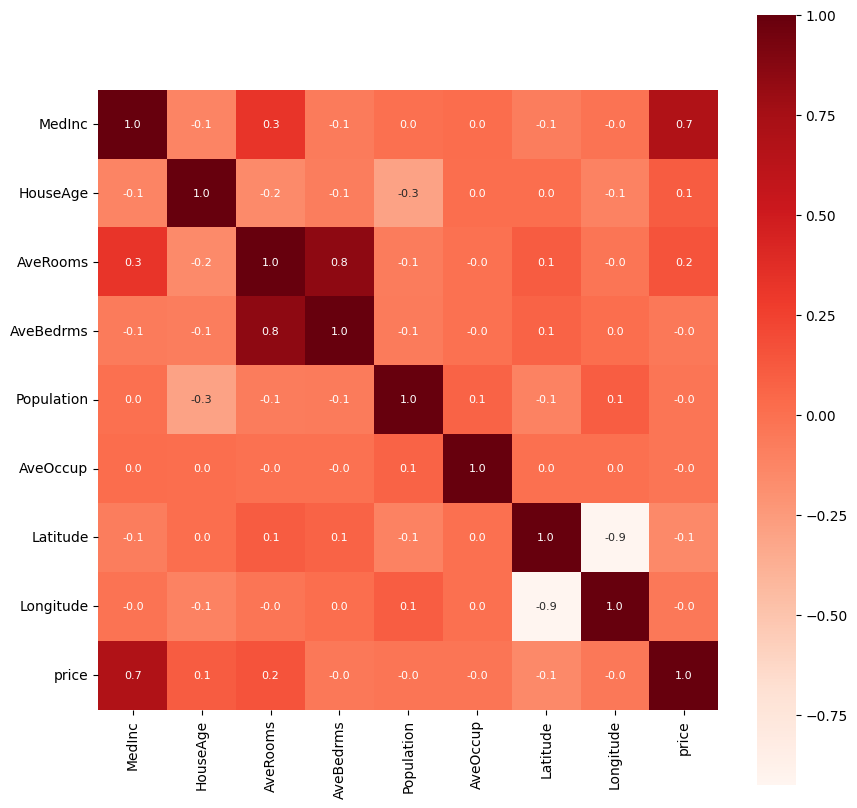

In [ ]:
correlation_matrix = house_price_dataframe.corr()
display(correlation_matrix)

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

corr to 1:strongly correlated
corr to -1:strong negative
corr to 0: no correlation


spliting data and target

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Split data

### Subtask:
Split the dataset into training and testing sets. This is crucial for evaluating the model's performance on unseen data.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Choose a model

### Subtask:
Select a suitable regression model for predicting house prices. Based on the initial analysis, a model like XGBoost, as imported in the first cell, could be a good choice.


**Reasoning**:
Instantiate an XGBoost Regressor model with default parameters.



In [ ]:
model = XGBRegressor()

## Train the model

### Subtask:
Train the chosen model using the training data.


**Reasoning**:
Train the XGBoost regressor model using the training data.



In [ ]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
training_data_prediction=model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


## Evaluate the model

### Subtask:
Evaluate the trained model's performance using the testing data and appropriate regression metrics (e.g., Mean Absolute Error, R-squared).


**Reasoning**:
Evaluate the trained model's performance using the testing data and appropriate regression metrics.



In [ ]:
# prediction on training data
training_data_prediction = model.predict(X_train)

# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

# prediction on test data
test_data_prediction = model.predict(X_test)

# R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_3)
print("Mean Absolute Error : ", score_4)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105
R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Use the trained model to make predictions on the test data.



## Visualize Actual vs Predicted Prices

### Subtask:
Compare the actual house prices with the predicted prices visually to assess the model's performance.

**Reasoning**:
Generate a scatter plot to visualize the actual prices against the predicted prices. This helps in understanding the spread of the predictions and identifying potential issues.

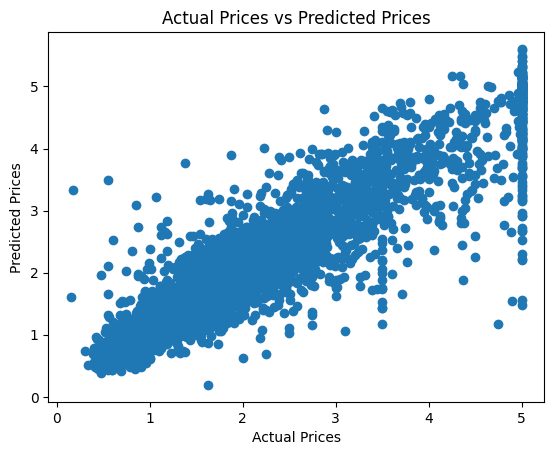

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Task
Tune the hyperparameters of the XGBoost Regressor model using GridSearchCV to reduce prediction error.

## Define parameter grid

### Subtask:
Define a grid of hyperparameters and their values to search over for the XGBoost Regressor model.


**Reasoning**:
Define a dictionary `param_grid` containing the hyperparameters and their values for the XGBoost Regressor model.



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

## Perform grid search

### Subtask:
Use GridSearchCV to search over the defined parameter grid and find the best hyperparameters for the XGBoost Regressor model, using the training data.


**Reasoning**:
Use GridSearchCV to search over the defined parameter grid and find the best hyperparameters for the XGBoost Regressor model, using the training data.



In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)